# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,plot_roc_curve,plot_precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

# Read data

In [2]:
# read data stored using pd.read_csv, then store the data in df dataframe
df = pd.read_csv('satisfaction.csv')

In [3]:
#show first five dataframe content 
df.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0


# Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   satisfaction_v2                    129880 non-null  object 
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Seat comfort                       129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Gate location                      1298

**Noted that: All the features are numeric except satisfaction, gender, customer type, type of travel, class

In [5]:
# check number of rows, number of columns 
df.shape

(129880, 24)

In [6]:
# check null values 
df.isnull().sum()

id                                     0
satisfaction_v2                        0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [7]:
# drop null rows since the dataset has enourmous number of rows
df1=df.dropna()
df1.isnull().sum()

id                                   0
satisfaction_v2                      0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [8]:
# make a copy of df1 stored in df2 and start exploring df2
df2=df1.copy()
df2.shape

(129487, 24)

In [9]:
df2.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [10]:
df2.describe()

,id,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,64958.335169,39.428761,1981.008974,2.838586,2.990277,2.852024,2.990377,3.249160,3.383745,3.519967,3.472171,3.465143,3.486118,3.695460,3.340729,3.705886,3.352545,14.643385,15.091129
std,37489.781165,15.117597,1026.884131,1.392873,1.527183,1.443587,1.305917,1.318765,1.345959,1.306326,1.305573,1.270755,1.292079,1.156487,1.260561,1.151683,1.298624,37.932867,38.465650
min,1.000000,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32494.500000,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64972.000000,40.000000,1924.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,97415.500000,51.000000,2543.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


# EDA

**Checking imbalance

[Text(0.5, 0, 'satisfaction')]

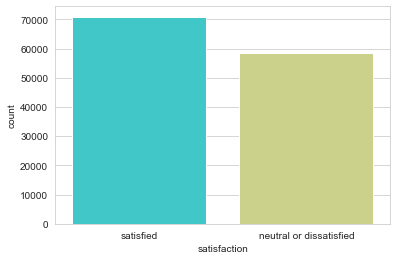

In [11]:
# visualization count of satisfied and non-satisfied
sns.set_style('whitegrid')
ax=sns.countplot(x=df2.satisfaction_v2 , data=df2, palette='rainbow' )
ax.set(xlabel="satisfaction")

**Noted that:
Count of satisfied people are more than dissatisfied with a very low difference which means the data is balanced and it does not require any resampling.

[Text(0.5, 0, 'satisfaction')]

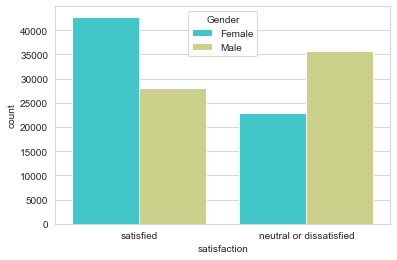

In [12]:
# visualization count of  satisfied and non-satisfied based on gender
sns.set_style('whitegrid')
ax=sns.countplot(x=df2.satisfaction_v2 , hue='Gender', data=df2 , palette='rainbow')
ax.set(xlabel="satisfaction")

**Noted that:
Female is satisfied more than male. On the other hand, male is dissatisfied than female

[Text(0.5, 0, 'satisfaction')]

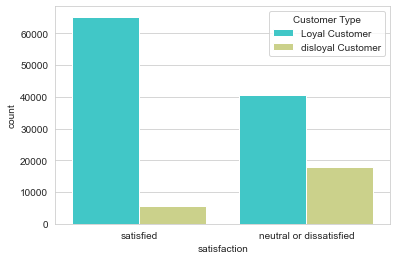

In [13]:
# visualization count of satisfied and non-satisfied based on loyality
sns.set_style('whitegrid')
ax=sns.countplot(x=df2.satisfaction_v2 , hue='Customer Type', data=df2 , palette='rainbow')
ax.set(xlabel="satisfaction")


**Noted that: People who were loyal are more satisfied than who were disloyal

[Text(0.5, 0, 'satisfaction')]

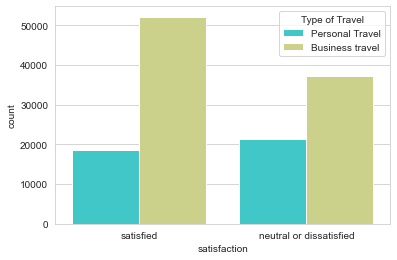

In [14]:
# visualization count of satisfied and non-satisfied based on Type of travel
sns.set_style('whitegrid')
ax=sns.countplot(x=df2.satisfaction_v2 , hue='Type of Travel', data=df2 , palette='rainbow')
ax.set(xlabel="satisfaction")


**Noted that:
People who were going on Business travel are more satisfied than who were on Personal travel

[Text(0.5, 0, 'satisfaction')]

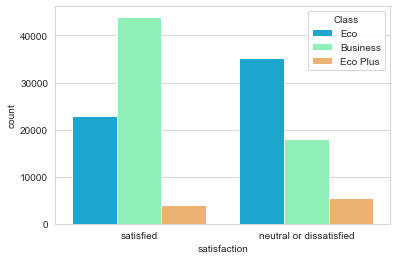

In [15]:
# visualization count of satisfied and non-satisfied based on  Class type 
sns.set_style('whitegrid')
ax=sns.countplot(x=df2.satisfaction_v2 , hue='Class', data=df2, palette='rainbow')
ax.set(xlabel="satisfaction")


**Noted that:
People who were on Business class are more satisfied than others on other classes

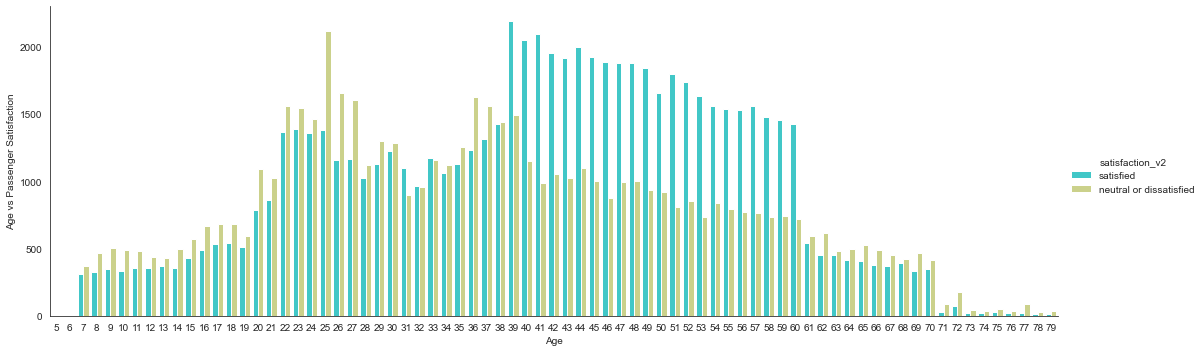

In [16]:
# visualization count of satisfied and non-satisfied based on Age
with sns.axes_style('white'):
    g = sns.catplot(x="Age", data=df2, aspect=3.0, kind='count', hue='satisfaction_v2', order=range(5, 80),palette='rainbow' )
    g.set_ylabels('Age vs Passenger Satisfaction')

**Noted that:
From the ages 7 to 38 and from the ages 61 to 79, the count of dissatisfied passengers is very high compared to satisfied passengers. On the other hand, in the ages range from 39 to 60, the count of satisfied passengers is higher compared to dissatisfied passengers.

In [17]:
# drop unnessary columns

df2.drop(columns={'id'}, inplace=True)

In [18]:
df2.head()

,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [19]:
# Create dummy values for objects values
class_dummies = pd.get_dummies(df2['Class'], drop_first=True)
type_of_travel = pd.get_dummies(df2['Type of Travel'],drop_first=True)
customer_type = pd.get_dummies(df2['Customer Type'],drop_first=True)
gender = pd.get_dummies(df2['Gender'],drop_first=True)
satisfaction = pd.get_dummies(df2['satisfaction_v2'],drop_first=True)

In [20]:
#Concat dummies with the dataframe used
df_dummies=pd.concat([df2,satisfaction,gender,customer_type,type_of_travel,class_dummies], axis='columns')

In [21]:
df_dummies.head()

,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfied,Male,disloyal Customer,Personal Travel,Eco,Eco Plus
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,3,2,0,0.0,1,0,0,1,1,0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,3,2,310,305.0,1,1,0,1,0,0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,4,2,0,0.0,1,0,0,1,1,0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,1,3,0,0.0,1,0,0,1,1,0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,2,5,0,0.0,1,0,0,1,1,0


In [22]:
#drop columns that we already created dummy values instead of.
df_dummies.drop(['satisfaction_v2','Gender','Customer Type','Type of Travel' , 'Class'], axis=1,inplace=True)

<AxesSubplot:>

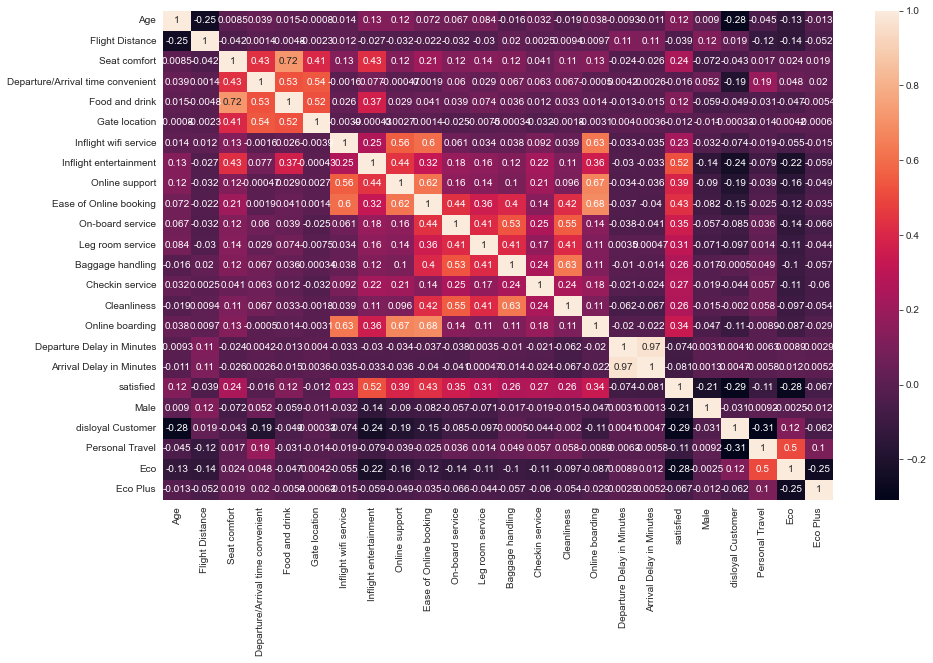

In [23]:
plt.figure(figsize=(15,9))
sns.heatmap(df_dummies.corr(), annot = True)

**Noted that:
"Departure Delay in Minutes" is highly correlated with "Arrival Delay in Minutes". Also "Food and drink" is highly correlated with "Seat comfort". But no pair is having corr. coefficient exactly equal to 1. So we are not discarding any variable.

In [24]:
df_dummies.head()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfied,Male,disloyal Customer,Personal Travel,Eco,Eco Plus
0,65,265,0,0,0,2,2,4,2,3,...,3,2,0,0.0,1,0,0,1,1,0
1,47,2464,0,0,0,3,0,2,2,3,...,3,2,310,305.0,1,1,0,1,0,0
2,15,2138,0,0,0,3,2,0,2,2,...,4,2,0,0.0,1,0,0,1,1,0
3,60,623,0,0,0,3,3,4,3,1,...,1,3,0,0.0,1,0,0,1,1,0
4,70,354,0,0,0,3,4,3,4,2,...,2,5,0,0.0,1,0,0,1,1,0


In [25]:
#Rename the columns with dummy values
df_dummies.rename(columns={'satisfied': 'Satisfaction', 'Male': 'Gender', 'disloyal Customer': 'Customer Type', 'Personal Travel': 'Type of Travel'}, inplace=True)

In [26]:
df_dummies.head()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfaction,Gender,Customer Type,Type of Travel,Eco,Eco Plus
0,65,265,0,0,0,2,2,4,2,3,...,3,2,0,0.0,1,0,0,1,1,0
1,47,2464,0,0,0,3,0,2,2,3,...,3,2,310,305.0,1,1,0,1,0,0
2,15,2138,0,0,0,3,2,0,2,2,...,4,2,0,0.0,1,0,0,1,1,0
3,60,623,0,0,0,3,3,4,3,1,...,1,3,0,0.0,1,0,0,1,1,0
4,70,354,0,0,0,3,4,3,4,2,...,2,5,0,0.0,1,0,0,1,1,0


In [27]:
# Copy all features in X except the target feature
X=df_dummies[['Age', 'Flight Distance','Gender','Customer Type','Type of Travel','Eco','Eco Plus', 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
                  'Inflight wifi service',  'Inflight entertainment','Online support', 'Ease of Online booking',
                  'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service','Cleanliness',
               'Online boarding','Departure Delay in Minutes','Arrival Delay in Minutes']]

In [28]:
# Copy target in y
y=df_dummies['Satisfaction']

In [29]:
# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [30]:
#Evaluate models with Root Mean Squared Error
def rmse(actuals, preds):
    return np.sqrt(((actuals-preds)**2).mean())

# Modeling

# 1. Logistic Regression Model

In [31]:
# Build a logistic regression model
# solver and max_iter is used to solve the problem (STOP: TOTAL NO. of ITERATIONS REACHED LIMIT)
model = LogisticRegression(solver='lbfgs', max_iter=3000) 

In [32]:
# Fit the model
model.fit(X_train, y_train)


LogisticRegression(max_iter=3000)

In [33]:
y_pred = model.predict(X_test)

In [34]:
# Calculate the root mean squared error for the model
rmse(y_pred, y_test)

0.4055278701916811

In [35]:
# Calculate the accuracy for test
model.score(X_test,y_test)

0.835547146497799

In [36]:
# Calculate the accuracy for train
model.score(X_train,y_train)

0.8352720848738766

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82     11596
           1       0.85      0.85      0.85     14302

    accuracy                           0.84     25898
   macro avg       0.83      0.83      0.83     25898
weighted avg       0.84      0.84      0.84     25898



# KFold (Logistic Regression Model)

In [38]:

#
# Create an instance of Pipeline
#
pipeline = make_pipeline(StandardScaler(), LogisticRegression())
#
# Create an instance of StratifiedKFold which can be used to get indices of different training and test folds
#
strtfdKFold = StratifiedKFold(n_splits=5)
kfold = strtfdKFold.split(X_train, y_train)
scores = []
#
#
#
for k, (train, test) in enumerate(kfold):
    pipeline.fit(X_train.iloc[train, :], y_train.iloc[train])
    score = pipeline.score(X_train.iloc[test, :], y_train.iloc[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train.iloc[train]), score))
 
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))


Fold:  1, Training/Test Split Distribution: [37607 45264], Accuracy: 0.836
Fold:  2, Training/Test Split Distribution: [37607 45264], Accuracy: 0.835
Fold:  3, Training/Test Split Distribution: [37607 45264], Accuracy: 0.832
Fold:  4, Training/Test Split Distribution: [37607 45264], Accuracy: 0.836
Fold:  5, Training/Test Split Distribution: [37608 45264], Accuracy: 0.837


Cross-Validation accuracy: 0.835 +/- 0.002


# 2. Random Forest Model

In [39]:
# Build a Random Forest model
model_f=RandomForestClassifier(n_estimators=40)
# Fit the model
model_f.fit(X_train, y_train)

RandomForestClassifier(n_estimators=40)

In [40]:
y_pred = model_f.predict(X_test)

In [41]:
# Calculate the root mean squared error for the model
rmse(y_pred, y_test)

0.20925382919327618

In [42]:
# Calculate the score for test
model_f.score(X_test,y_test)

0.9562128349679512

In [43]:
# Calculate the score for train
model_f.score(X_train,y_train)

0.9998455434457326

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11596
           1       0.97      0.95      0.96     14302

    accuracy                           0.96     25898
   macro avg       0.96      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898



# KFold (Random Forest Model)

In [45]:

#
# Create an instance of Pipeline
#
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=40))
#
# Create an instance of StratifiedKFold which can be used to get indices of different training and test folds
#
strtfdKFold = StratifiedKFold(n_splits=5)
kfold = strtfdKFold.split(X_train, y_train)
scores = []
#
#
#
for k, (train, test) in enumerate(kfold):
    pipeline.fit(X_train.iloc[train, :], y_train.iloc[train])
    score = pipeline.score(X_train.iloc[test, :], y_train.iloc[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train.iloc[train]), score))
 
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

Fold:  1, Training/Test Split Distribution: [37607 45264], Accuracy: 0.953
Fold:  2, Training/Test Split Distribution: [37607 45264], Accuracy: 0.953
Fold:  3, Training/Test Split Distribution: [37607 45264], Accuracy: 0.953
Fold:  4, Training/Test Split Distribution: [37607 45264], Accuracy: 0.956
Fold:  5, Training/Test Split Distribution: [37608 45264], Accuracy: 0.954


Cross-Validation accuracy: 0.954 +/- 0.001


# Comparing Models

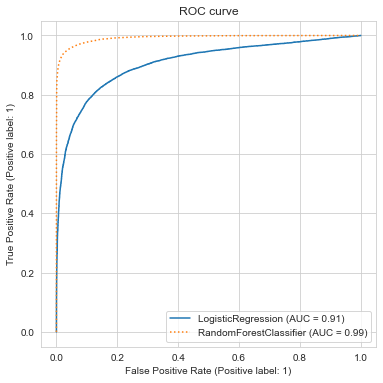

In [46]:
fig, (ax1) = plt.subplots(1, figsize=(6, 6),sharex=True)

plot_roc_curve(model, X_test, y_test,ax=ax1)
plot_roc_curve(model_f, X_test, y_test,ax=ax1,linestyle=':')


ax1.set_title('ROC curve')
plt.show()

**Noted that:
Using ROC curve shows that RandomForestClassifier is working better than LogisticRegression